In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
data = pd.read_csv('/content/train.csv')
test = pd.read_csv('tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [289]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [291]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [292]:
drop_cols = ['Cabin','Ticket','Name','PassengerId']
data.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

In [293]:
data['Age'] = data.groupby(['Pclass','Sex'])['Age']\
                     .transform(lambda x: x.fillna(x.median()))

test['Age'] = test.groupby(['Pclass','Sex'])['Age']\
                    .transform(lambda x: x.fillna(x.median()))

test['Fare'].fillna(data['Fare'].median(), inplace=True)

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-823/395142107.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(data['Fare'].median(), inplace=True)
/tmp/ipython-input-823/395142107.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [294]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [295]:
for df in [data, test]:
    df['Sex'] = df['Sex'].map({'male':1,'female':0})

data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

In [296]:
for df in [data, test]:
    df['Fare'] = np.log1p(df['Fare'])

In [297]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,2.110213,False,True
1,1,1,0,38.0,1,0,4.280593,False,False
2,1,3,0,26.0,0,0,2.188856,False,True
3,1,1,0,35.0,1,0,3.990834,False,True
4,0,3,1,35.0,0,0,2.202765,False,True


In [298]:
for df in [data, test]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

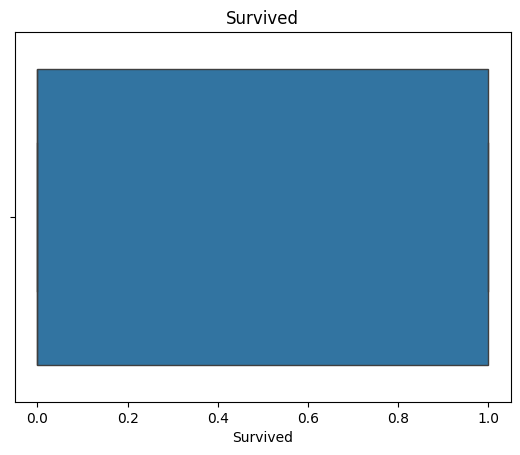

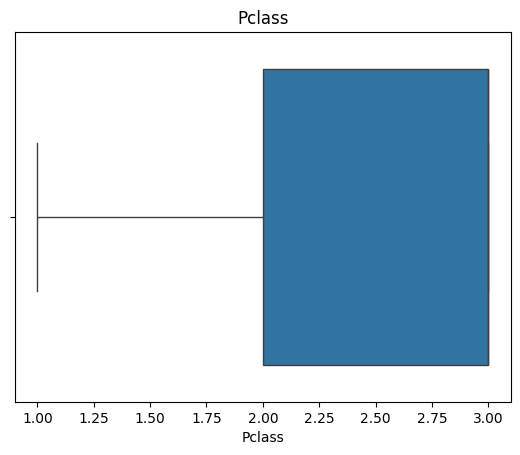

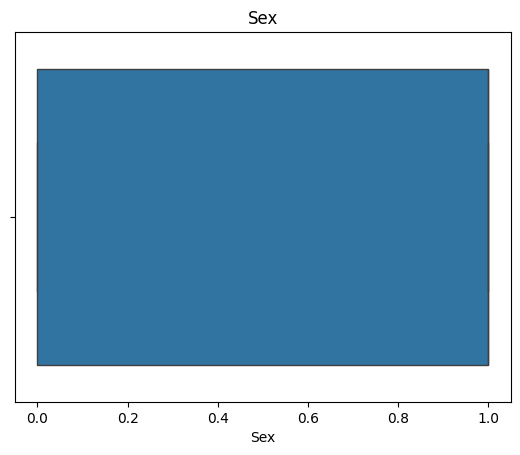

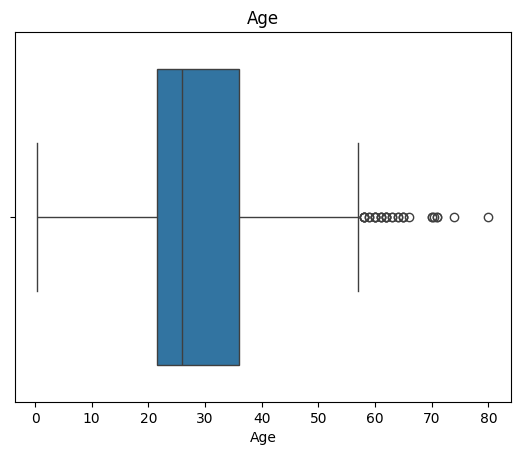

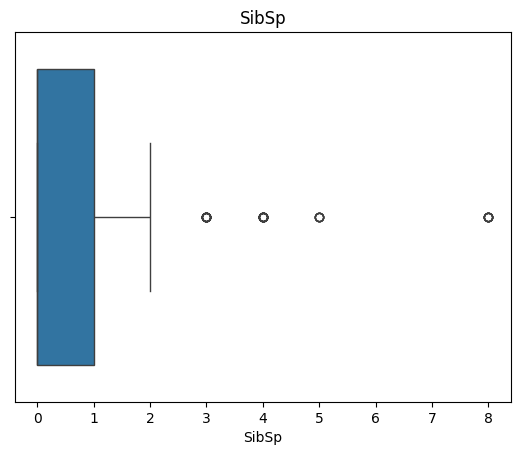

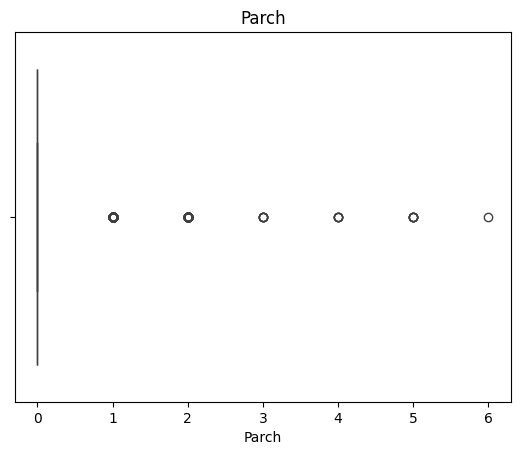

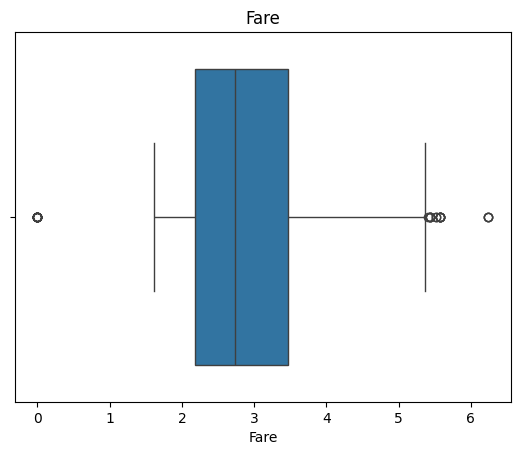

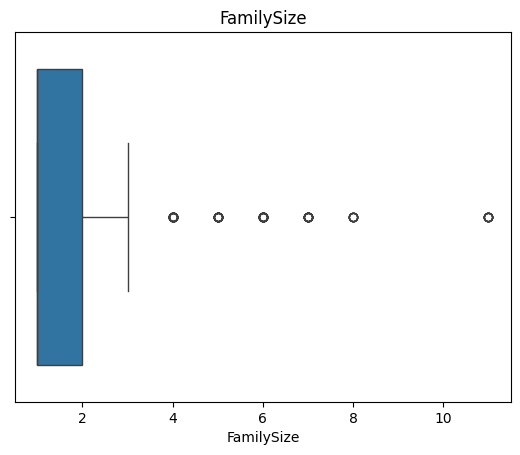

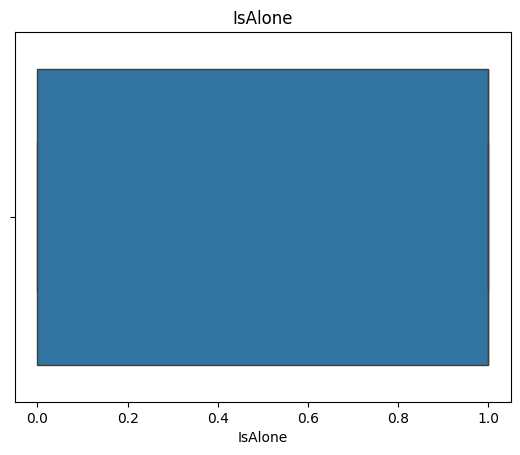

In [299]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()

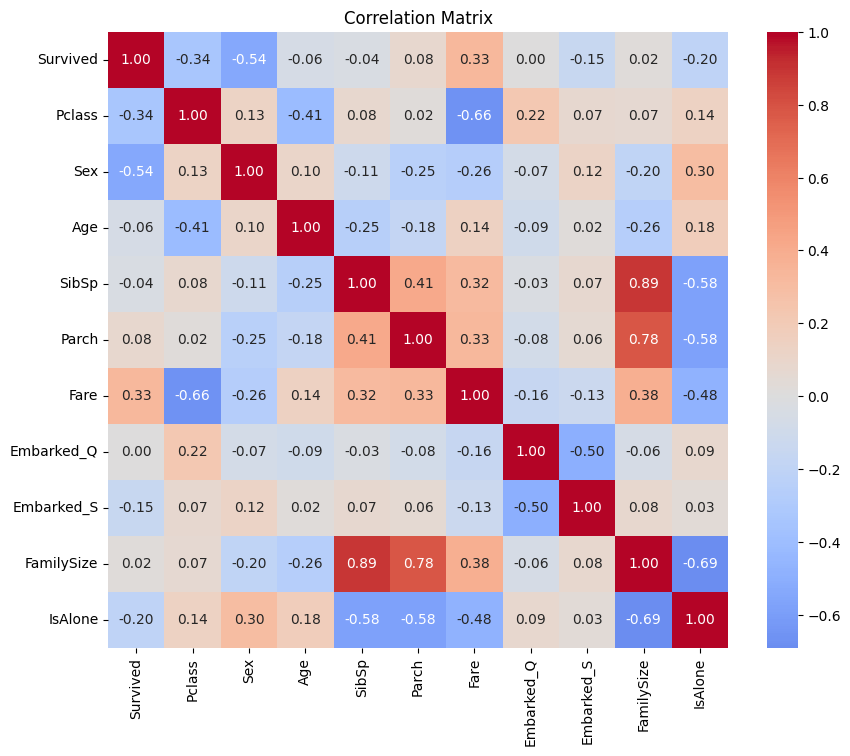

In [300]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [301]:
data.corr()['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.329862
Parch,0.081629
FamilySize,0.016639
Embarked_Q,0.003650
SibSp,-0.035322
Age,-0.059579
Embarked_S,-0.149683
IsAlone,-0.203367
Pclass,-0.338481


In [302]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [303]:
X_test = test

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


model = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train , y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [306]:
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Mean AUC:", scores.mean())
print("Std:", scores.std())

Mean AUC: 0.868647174720053
Std: 0.03051541764763005


In [307]:
from sklearn.metrics import accuracy_score , roc_auc_score

y_pred=model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

print('Accuracy:', accuracy_score(y_val,y_pred))
print("AUC:", roc_auc_score(y_val, y_prob))

Accuracy: 0.8044692737430168
AUC: 0.9005791505791506


In [308]:
import pandas as pd

importance = pd.Series(model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))

Sex           0.463098
Fare          0.155838
Pclass        0.135760
Age           0.110179
FamilySize    0.057419
SibSp         0.025298
Embarked_S    0.018665
Parch         0.015994
IsAlone       0.012787
Embarked_Q    0.004961
dtype: float64


In [309]:
model.score(X_train, y_train)


0.8567415730337079

In [310]:
model.score(X_val, y_val)

0.8044692737430168

In [311]:
final_model = RandomForestClassifier(
    n_estimators=500,
    min_samples_leaf=3,
    random_state=42
)

final_model.fit(X, y)

RandomForestClassifier(min_samples_leaf=3, n_estimators=500, random_state=42)

In [312]:
X_test = X_test.drop('Survived', axis=1)

In [313]:
test_predictions = final_model.predict(X_test)

In [314]:
test_original = pd.read_csv("tested.csv")
test_ids = test_original["PassengerId"]

In [315]:
submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": test_predictions
})

submission.to_csv("submission.csv", index=False)